In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
#from xhistogram.xarray import histogram

## Helper and evaluation functions

### Drawn from q*-profiles.py and Figures_article1.ipynb.

In [2]:
def file_prefix(j):
    if len(str(j)) == 1:
       return '000'
    elif len(str(j)) == 2:
       return '00'
    elif len(str(j)) == 3:
       return '0'
    else:
       return 'Inappropriate length of input to file_prefix'

In [3]:
# basedir is the base directory where the nc files are found.
# tag is how to label the output npy.
# startindx and endinx are the files over which to iterate.
def meanProfile(basedir, tag, startindx, endindx, fileprefix, filesuffix):
    # How many vertical levels
    c = 120
    QI = np.zeros((endindx+1-startindx,c))

    for i in np.arange(startindx,endindx+1):
        print(i)
        prefix = file_prefix(i)
        datei = xr.open_dataset(basedir + fileprefix + '_icon_tropic_' + prefix + str(i) + '_PL2' + filesuffix + '.nc')
        QI[i-startindx] = datei.qi.isel(time=0).mean(dim={'lat','lon'})  #'ncells'
    print('Saving hourly mean profiles from ' + basedir + '...')
    np.save('../output/QI_' + tag + filesuffix + '.npy',QI)
    return QI

In [4]:
# Helper function to make sexy axes for pressure levels
def sexy_axes2(ax, fs, ylab):
    ax.set_ylim([50,800])
    ax.set_yscale('log')
    ax.set_yticks([800,500,300,100])
    ax.set_yticklabels(['800','500','300','100'])
    if ylab == True:
        ax.set_ylabel('Pressure [hPa]',fontsize=fs)
    ax.invert_yaxis()
    
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left') 
    ax.tick_params('both',labelsize=fs,rotation=45)

###  Defining a function to store histograms over time here

In [5]:
# basedir is the base directory where the nc files are found.
# tag is how to label the output npy.
# startindx and endinx are the files over which to iterate.
def histOverTime(basedir, tag, startindx, endindx, fileprefix, filesuffix):
    # These bins are defined, assuming that the variable of interest is column-integrated ice mass.
    bins = np.logspace(-1,3,50)
    TQI = np.zeros((endindx+1-startindx,len(bins)-1))

    for i in np.arange(startindx,endindx+1):
        print(i)
        prefix = file_prefix(i)
        datei = xr.open_dataset(basedir + fileprefix + '_icon_tropic_' + prefix + str(i) + filesuffix + '.nc')
        tqi = datei.tqi.isel(time=0).values.flatten()*1000   # convert kg m-2 to g m-2
        #print(tqi.min(),tqi.mean(),tqi.max())
        wgts = np.ones_like(tqi)/float(len(tqi))*100
        h, _ = np.histogram(tqi,bins=bins,weights=wgts)
        TQI[i-startindx] = h
    print('Saving histograms from ' + basedir + '...')
    np.save('../output/TQI_hist_' + tag + filesuffix + '.npy',TQI)
    return TQI

In [6]:
# Small utility function to convert degrees to radians.
def degToRad(deg):
    return deg*np.pi/180.

## Generate and visualize the domain-mean profiles every 10 minutes

Text(0.07, 0.8, '83-89$^{\\circ}$E, 18-30$^{\\circ}$N')

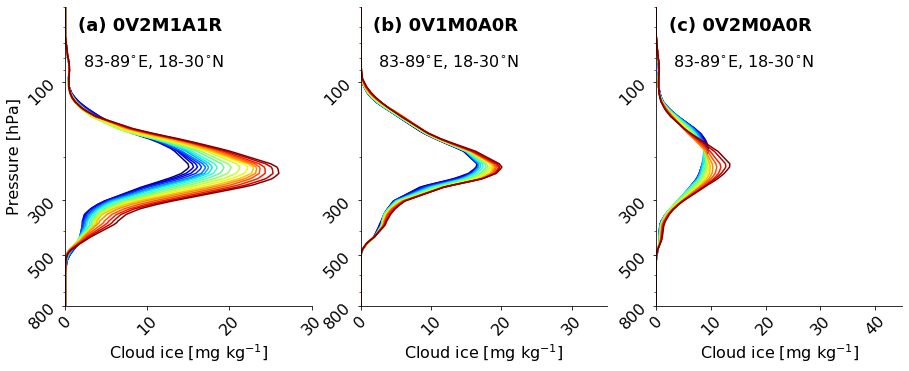

In [22]:
QI_0V2M1A1R = np.load('../output/QI_0V2M1A1R_F10MIN_flight-track.npy')
QI_0V1M0A0R = np.load('../output/QI_0V1M0A0R_F10MIN_flight-track.npy')
QI_novgrid = np.load('../output/QI_novgrid_F10MIN_flight-track.npy')
pl = np.loadtxt('../remapping/PMEAN_48-72.txt')

fs = 16
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5.5))
colors = plt.cm.jet(np.linspace(0,1,18))
for i in np.arange(18):
    ax[0].plot(QI_0V2M1A1R[i]*10**6,pl/100,color=colors[i])
sexy_axes2(ax[0], fs, True)
ax[0].set_xlim([0,30])
ax[0].set_xlabel(r'Cloud ice [mg kg$^{-1}$]',fontsize=fs)
ax[0].text(0.05,0.92,'(a) 0V2M1A1R',fontsize=fs+2,fontweight='bold',transform=ax[0].transAxes)
ax[0].text(0.07,0.8,r'83-89$^{\circ}$E, 18-30$^{\circ}$N',fontsize=fs,transform=ax[0].transAxes)

for i in np.arange(18):
    ax[1].plot(QI_0V1M0A0R[i]*10**6,pl/100,color=colors[i])
sexy_axes2(ax[1], fs, False)
ax[1].set_xlim([0,35])
ax[1].set_xlabel(r'Cloud ice [mg kg$^{-1}$]',fontsize=fs)
ax[1].text(0.05,0.92,'(b) 0V1M0A0R',fontsize=fs+2,fontweight='bold',transform=ax[1].transAxes)
ax[1].text(0.07,0.8,r'83-89$^{\circ}$E, 18-30$^{\circ}$N',fontsize=fs,transform=ax[1].transAxes)

for i in np.arange(18):
    ax[2].plot(QI_novgrid[i]*10**6,pl/100,color=colors[i])
sexy_axes2(ax[2], fs, False)
ax[2].set_xlim([0,45])
ax[2].set_xlabel(r'Cloud ice [mg kg$^{-1}$]',fontsize=fs)
ax[2].text(0.05,0.92,'(c) 0V2M0A0R',fontsize=fs+2,fontweight='bold',transform=ax[2].transAxes)
ax[2].text(0.07,0.8,r'83-89$^{\circ}$E, 18-30$^{\circ}$N',fontsize=fs,transform=ax[2].transAxes)

#fig.savefig('../output/QI_profiles_over_time_flight-track2.pdf',bbox_inches='tight')

## Generate pdfs of column-integrated cloud ice 

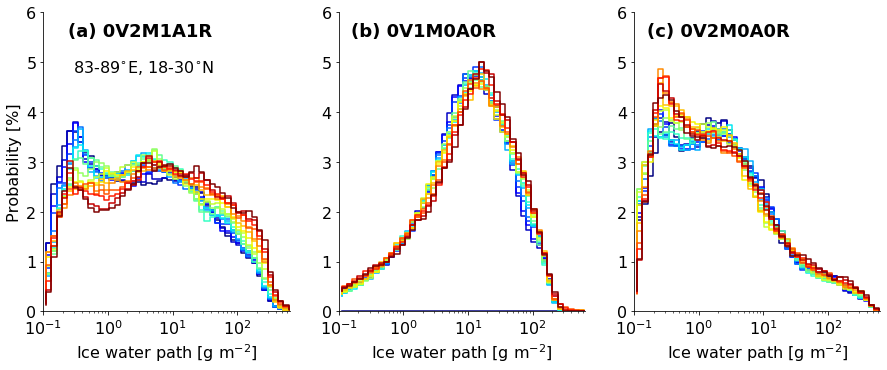

In [26]:
TQI_0V2M1A1R = np.load('../output/TQI_hist_0V2M1A1R_flight-track.npy')
TQI_0V1M0A0R = np.load('../output/TQI_hist_0V1M0A0R_flight-track.npy')
TQI_novgrid = np.load('../output/TQI_hist_novgrid_flight-track.npy')
pl = np.loadtxt('../remapping/PMEAN_48-72.txt')

# These bins are defined, assuming that the variable of interest is column-integrated ice mass.
bins = np.logspace(-1,3,50)
midpts = (bins[1:] + bins[:-1])/2.
zeit = ['0440','0450','0500','0510','0520','0530','0540','0550','0600','0610','0620',
       '0630','0640','0650','0700','0710','0720','0730']

fs = 16
fig2, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5.5))
colors = plt.cm.jet(np.linspace(0,1,18))
for i in np.arange(18):
    ax[0].step(midpts,TQI_0V2M1A1R[i],color=colors[i])
ax[0].tick_params('both',labelsize=fs)
ax[0].set_xlim([0.1,650])
ax[0].set_ylim([0,6])
ax[0].set_xscale('log')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].set_xlabel(r'Ice water path [g m$^{-2}$]',fontsize=fs)
ax[0].set_ylabel('Probability [%]',fontsize=fs)
#ax[0].set_xlabel(r'Cloud ice [mg kg$^{-1}$]',fontsize=fs)
ax[0].text(0.1,0.92,'(a) 0V2M1A1R',fontsize=fs+2,fontweight='bold',transform=ax[0].transAxes)
ax[0].text(0.12,0.8,r'83-89$^{\circ}$E, 18-30$^{\circ}$N',fontsize=fs,transform=ax[0].transAxes)

for i in np.arange(18):
    ax[1].step(midpts,TQI_0V1M0A0R[i],color=colors[i])
    #if i < 9:
    #    ax[1].text(0.15,0.8-i*0.05,zeit[i],fontsize=fs-2,color=colors[i],transform=ax[1].transAxes)
ax[1].tick_params('both',labelsize=fs)
ax[1].set_xlim([0.1,650])
ax[1].set_ylim([0,6])
ax[1].set_xscale('log')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].set_xlabel(r'Ice water path [g m$^{-2}$]',fontsize=fs)
ax[1].text(0.05,0.92,'(b) 0V1M0A0R',fontsize=fs+2,fontweight='bold',transform=ax[1].transAxes)

for i in np.arange(18):
    ax[2].step(midpts,TQI_novgrid[i],color=colors[i])
    #ax[2].text(0.6,0.8-(i-9)*0.05,zeit[i],fontsize=fs-2,color=colors[i],transform=ax[2].transAxes)
ax[2].tick_params('both',labelsize=fs)
ax[2].set_xlim([0.1,650])
ax[2].set_ylim([0,6])
ax[2].set_xscale('log')
ax[2].spines['right'].set_color('none')
ax[2].spines['top'].set_color('none')
ax[2].set_xlabel(r'Ice water path [g m$^{-2}$]',fontsize=fs)
ax[2].text(0.05,0.92,'(c) 0V2M0A0R',fontsize=fs+2,fontweight='bold',transform=ax[2].transAxes)

#fig2.savefig('../output/TQI_hists_over_time_flight-track.pdf',bbox_inches='tight')

# Extract the trajectories necessary based on the PDFs and profiles above

### More specifically for the 0V2M0A0R settings under which we ran the trajectories, extract trajectories that traverse 83-89 E, 18-30 N from 0610-0730 UTC 

In [7]:
print('Lower latitude [rad]: ' + str(degToRad(18)))
print('Upper latitude [rad]: ' + str(degToRad(30)))
print('Lower longitude [rad]: ' + str(degToRad(83)))
print('Upper longitude [rad]: ' + str(degToRad(89)))

Lower latitude [rad]: 0.3141592653589793
Upper latitude [rad]: 0.5235987755982988
Lower longitude [rad]: 1.4486232791552935
Upper longitude [rad]: 1.5533430342749535


In [9]:
# Units and names for variables in the trajectory files.
vunits = ['','rad','rad','m','m s-1','kg m-3','K','Pa','kg kg-1','kg kg-1','kg-1','kg kg-1','kg-1','kg kg-1',
          'kg-1','kg kg-1','kg-1','kg kg-1','kg-1','kg-1','kg-1','kg kg-1','kg kg-1','','s']
lname = ['trajectory index','deg longitude E','deg latitude N','altitude','vertical velocity',
         'air density','air temperature','air pressure','vapor mass mixing ratio','ice mass mixing ratio',
         'ice crystal number conc','liquid water mass mixing ratio','cloud droplet number conc',
         'snow mass mixing ratio','snow number conc','rain mass mixing ratio','rain drop number conc',
         'graupel mass mixing ratio','graupel number conc','ice sedimentation mass flux in',
         'ice sedimentation mass flux out','ice sedimentation number flux in','ice sedimentation number flux out',
         'grid cell index','time after the simulation start']

In [11]:
basedir = '/scratch/b/b380873/traj_full51h_fast/'
for i in np.arange(1, 31):
    print(i)
    f = basedir + 'traj_tst00000450_p' + file_prefix(i)[1:] + str(i) + '.nc'
    datei = xr.open_dataset(f)#'_trim.nc')
    
    # Extract timesteps 6775-6975 within the trajectory file, corresponding to 0610 / 0730 UTC.
    lat_subset = datei.lat.values[6775:6975]
    lon_subset = datei.lon.values[6775:6975]
    
    # Now identify the trajectories that traverse the small domain around the flight track during this period.
    # where True yield first argument, where False yield second
    lat_subset2 = np.where( ((lat_subset >= degToRad(18)) & (lat_subset <= degToRad(30)) &
                            ((lon_subset >= degToRad(83)) & (lon_subset <= degToRad(89)))), 
                             lat_subset, np.nan )
    
    
    # Return the indices of columns that are not nan for all time (axis=0) after the operation above.
    j = ~np.all(np.isnan(lat_subset2),axis=0)
    
    # List of trajectory indices that met the criterion above.
    k = [jj_indx for jj_indx, jj in enumerate(j) if jj == True]
    
    # Add the trajectory variables for ids in k to an updated xarray dataset.
    datei2 = xr.Dataset()
    for j,v in enumerate(datei):
        if (str(v) != 'rtime'):
            v1 = datei[v].isel(id=k)
            v1.attrs['units'] = vunits[j]
            v1.attrs['long_name'] = lname[j]
            datei2[str(v)] = v1
            if j == 0:
                print(v1.shape)
        else:
            v1 = datei[v]
            v1.attrs['units'] = vunits[j]
            v1.attrs['long_name'] = lname[j]
            datei2[str(v)] = v1
            
    datei2.to_netcdf(f[:-3] + '_trim.nc')
    print('Saving ' + f[:-3] + '_trim.nc')
    

11
(9450, 1342)
12
(9450, 1293)
13
(9450, 1258)
14
(9450, 1065)
15
(9450, 1054)
16
(9450, 1118)
17
(9450, 1327)
18
(9450, 1354)
